In [1]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
!pip install awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [3]:
import awswrangler as wr
path = f"s3://source-voltar/source/apple_daily_close.csv"
df=wr.s3.read_csv(path)
df.tail()

date        open        high         low       close    adjclose  \
1816  2022-09-26  149.660004  153.770004  149.639999  150.770004  150.770004   
1817  2022-09-27  152.740005  154.720001  149.949997  151.759995  151.759995   
1818  2022-09-28  147.639999  150.639999  144.839996  149.839996  149.839996   
1819  2022-09-29  146.100006  146.720001  140.679993  142.479996  142.479996   
1820  2022-09-30  141.279999  143.100006  138.000000  138.199997  138.199997   

         volume ticker  
1816   93339400   AAPL  
1817   84442700   AAPL  
1818  146691400   AAPL  
1819  128138200   AAPL  
1820  124705400   AAPL

In [29]:
!pip install alpaca-trade-api

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [67]:
#import libraries
import os
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline

In [69]:
# Load .env enviroment variables
load_dotenv()

True

In [70]:
# Set Alpaca API key and secret

#get the base directory
basepath=Path()
basedir=str(basepath.cwd())
#load the environment variables
envars= basepath.cwd() / '.env'
load_dotenv(envars)

# authentication and connection details
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')
base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

In [71]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-07-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-30', tz='America/New_York').isoformat()

In [72]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AAPL"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_monte_carlo = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AAPL = df_monte_carlo[df_monte_carlo['symbol']=='AAPL'].drop('symbol', axis=1)
AAPL.drop(columns=['trade_count', 'vwap'], inplace=True)

# Display sample data
df_stock_data.head()

AAPL                                  
                             open    high     low   close    volume
timestamp                                                          
2015-12-01 05:00:00+00:00  118.73  118.81  116.86  117.34  34852374
2015-12-02 05:00:00+00:00  117.00  118.11  116.08  116.28  33385643
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785
2015-12-04 05:00:00+00:00  115.20  119.25  115.11  119.03  57776977
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754

In [86]:
# Configuring a Monte Carlo simulation to forecast 252 days cumulative returns
MC_252Days = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252
)

In [87]:
# Printing the simulation input data
MC_252Days.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  118.73  118.81  116.86  117.34  34852374   
2015-12-02 05:00:00+00:00  117.00  118.11  116.08  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785   
2015-12-04 05:00:00+00:00  115.20  119.25  115.11  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754   

                                        
                          daily_return  
timestamp                               
2015-12-01 05:00:00+00:00          NaN  
2015-12-02 05:00:00+00:00    -0.009034  
2015-12-03 05:00:00+00:00    -0.009288  
2015-12-04 05:00:00+00:00     0.033247  
2015-12-07 05:00:00+00:00    -0.006301

In [88]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_252Days.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/home/ec2-user/SageMaker/FinTech-Project2/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.016633  1.027443  0.973584  0.986979  1.027230  1.087972  1.012012   
2    0.981860  1.037322  0.969686  1.015388  1.040728  1.089759  1.033788   
3    0.989197  0.992058  0.977816  1.021637  1.035082  1.117654  1.023201   
4    0.960765  0.964199  0.958195  1.009558  1.055097  1.051862  1.023019   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.290320  1.113560  0.864407  0.419518  1.330581  1.267573  0.623211   
249  1.233349  1.110787  0.875509  0.430706  1.314482  1.214289  0.656160   
250  1.253242  1.123121  0.867784  0.434812  1.344575  1.265358  0.633233   
251  1.253766  1.121766  0.879103  0.430682  1.382095  1.307430  0.644870   
252  1.207094  1.178775  0.851453  0.442009  1.392691  1.349051  0.625647   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.007437  1.064907  0.992191  ...  1.020552  0.983743  0.984514   
2    1.020287  1.034227  1.034754  ...  1.014234  0.988482  1.010207   
3    1.040739  1.019507  1.013887  ...  1.017385  0.985306  0.982797   
4    1.038046  1.035797  0.980357  ...  1.034126  1.006436  0.958491   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.410331  1.639514  1.174231  ...  2.431836  1.664398  0.572783   
249  1.350536  1.627477  1.132512  ...  2.466010  1.707602  0.535532   
250  1.369362  1.625630  1.155462  ...  2.543899  1.686682  0.525344   
251  1.391358  1.619003  1.181653  ...  2.552078  1.648098  0.538854   
252  1.383620  1.613586  1.097808  ...  2.640029  1.625725  0.553350   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.034051  0.964952  1.009929  0.994782  0.957666  0.968417  0.997594  
2    0.984934  0.950529  1.066802  1.011046  0.988730  0.956927  0.989305  
3    1.013457  0.939664  1.070026  1.007766  1.020435  0.978554  1.003964  
4    1.033232  0.925390  1.043687  1.015254  1.019104  0.995860  0.979575  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.288684  0.794419  1.136961  1.055274  1.468841  2.101348  0.826140  
249  1.294555  0.801005  1.117558  1.029240  1.428123  2.041448  0.839163  
250  1.234244  0.817272  1.128964  1.050339  1.493780  1.969931  0.814243  
251  1.163145  0.787353  1.130554  1.055432  1.480191  1.990467  0.825028  
252  1.116491  0.793467  1.110391  1.037249  1.510739  2.015809  0.822176  

[253 rows x 500 columns]

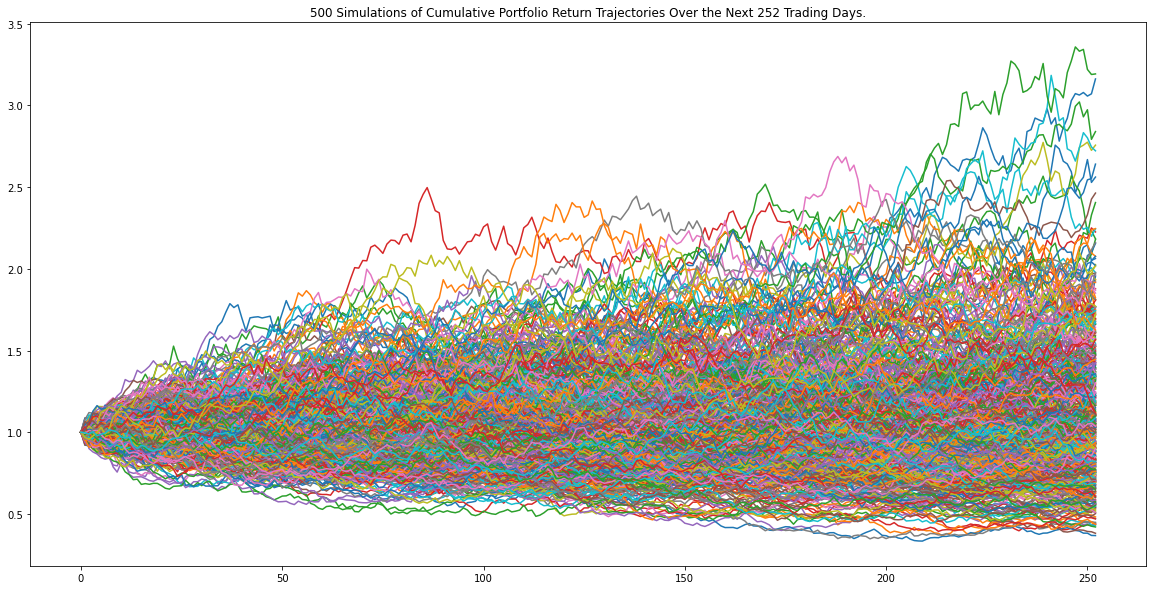

In [89]:
# Plot simulation outcomes
line_plot = MC_252Days.plot_simulation()

# Save the plot for future usage
plt.rcParams["figure.figsize"] = (10,8)
line_plot.get_figure().savefig("plots/MC_252Days_sim_plot_AAPL.png",)

In [90]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_252Days.simulated_return.mean(axis=1)),
    "median": list(MC_252Days.simulated_return.median(axis=1)),
    "min": list(MC_252Days.simulated_return.min(axis=1)),
    "max": list(MC_252Days.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.002094  1.001675  0.921451  1.087972
2  1.002934  1.001753  0.900563  1.120746
3  1.003442  1.001240  0.879656  1.129953
4  1.002038  0.998682  0.867412  1.163133

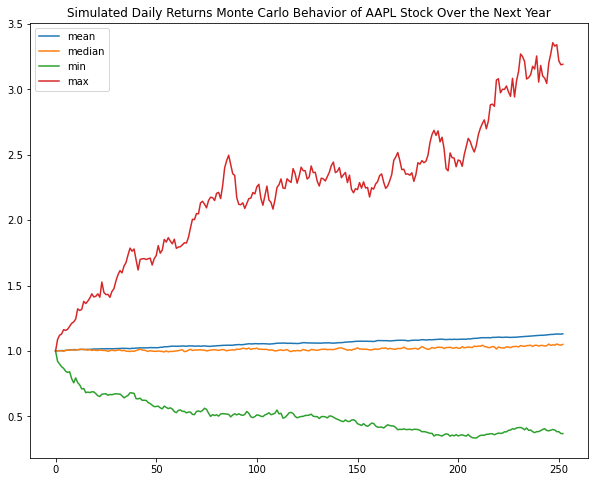

In [95]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
line_plot_returns=df_simulated_returns.plot(title="Simulated Daily Returns Monte Carlo Behavior of AAPL Stock Over the Next Year")

# Save the plot for future usage
plt.rcParams["figure.figsize"] = (10,8)
line_plot_returns.get_figure().savefig("plots/MC_252Days_forecast_plot_AAPL.png",)